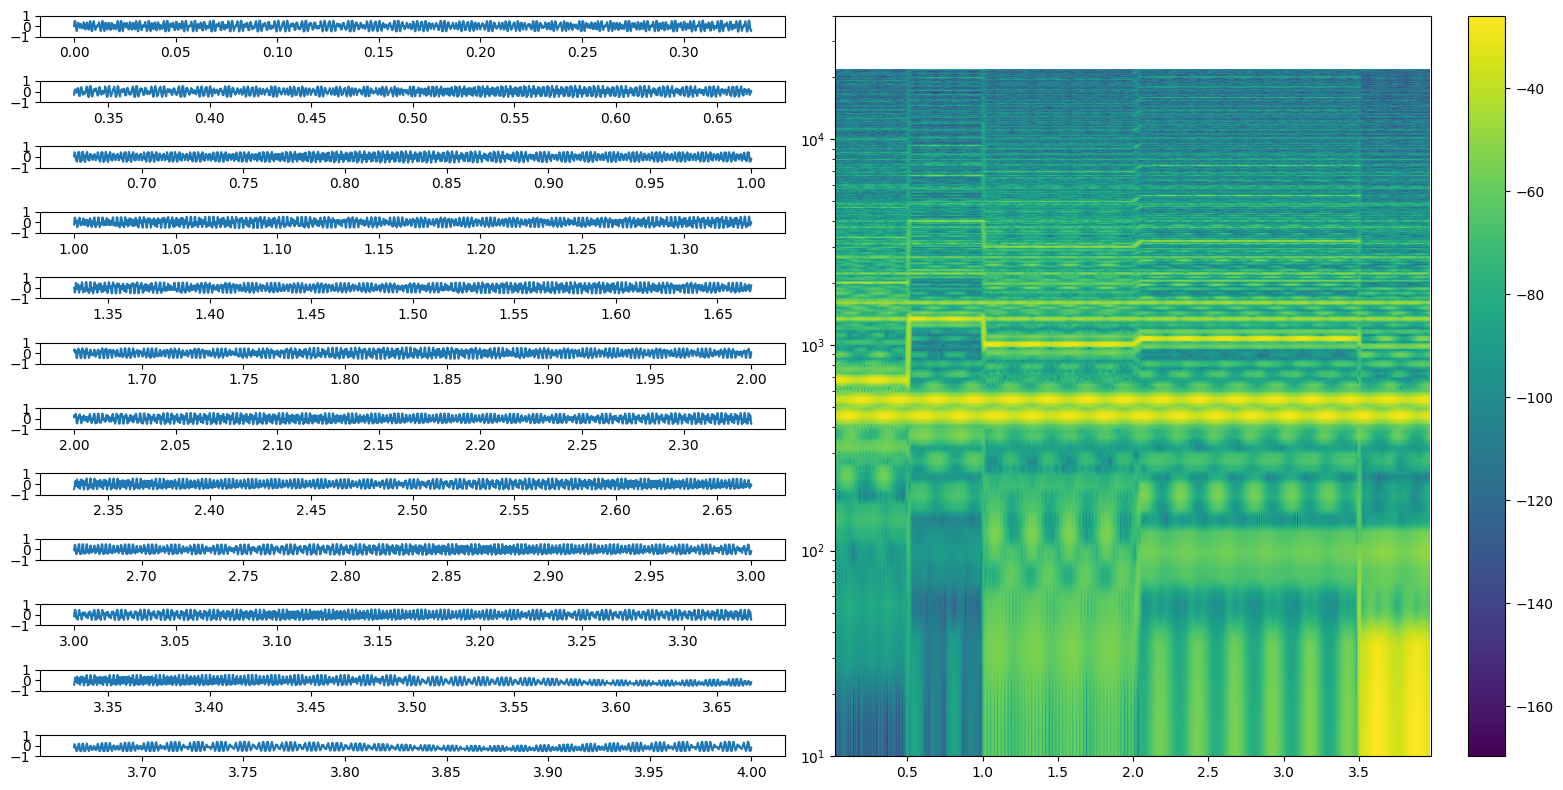

In [1]:
import waveform_generators as wg
s = wg.Clip(
    (
        wg.Clip(wg.Sine(440), -6 * (1 + 0.8 * wg.Sine(4.1, 0.3))).gain(-9)
        + wg.Clip(wg.Sine(440 * 6 / 5), -6 * (1 + 0.8 * wg.Sine(4))).gain(-9)
        + wg.Clip(wg.Sine(
            440 * 3 / 2 * wg.PiecewiseLinear(
                [0.0, 0.5, 0.51, 1.0, 1.01, 2.0, 2.05, 3.5],
                [1.0, 1.0, 2.00, 2.0, 1.50, 1.5, 1.60, 1.6],
            )
        ), -6 * (1 + 0.8 * wg.Sine(3.9, 0.6))).gain(-9)
    ),
    -7.5, softness=0.2
).gain(3)

fig = s.visualize(tmax=4)
s.to_audio(tmax=4)